# Introduction
In this project, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called "Fashion MNIST", consisting of small greyscale images of items of fashion. We will also generate visualzations which will help provide a comprehensive view of your model's performance, from the initial data exploration to model evaluation and post-training analysis.

# Learning Objectives

* Understand how to use Keras Layers to build a neural network architecture
* Understand how a model is trained and evaluated
* Understand the concept of train/validation/test split and why it's useful

In [1]:
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment.

![Texte alternatif…](https://res.cloudinary.com/practicaldev/image/fetch/s---fNWEeWA--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

# Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on future data that we have not seen yet. We say that we want our models to be able to generalise well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a training set, a validation set and a test set. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

In [2]:
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

# Construct a validation set from the last 10000 images and labels from train_and_validation_images and train_and_validation_labels
validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]


In [4]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

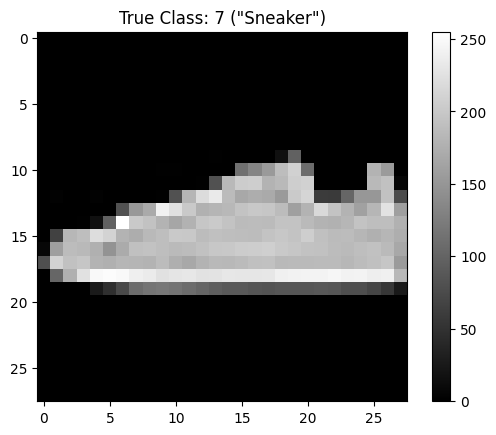

In [5]:


plt.figure()
random_index = np.random.randint(0, len(train_images))
plt.imshow(train_images[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]

# Check if the numerical_label is within the range of text_labels
if numerical_label < len(text_labels):
    text_description = text_labels[numerical_label]
    plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))
else:
    plt.title('True Class: {}'.format(numerical_label))

plt.gca().grid(False)
plt.show()

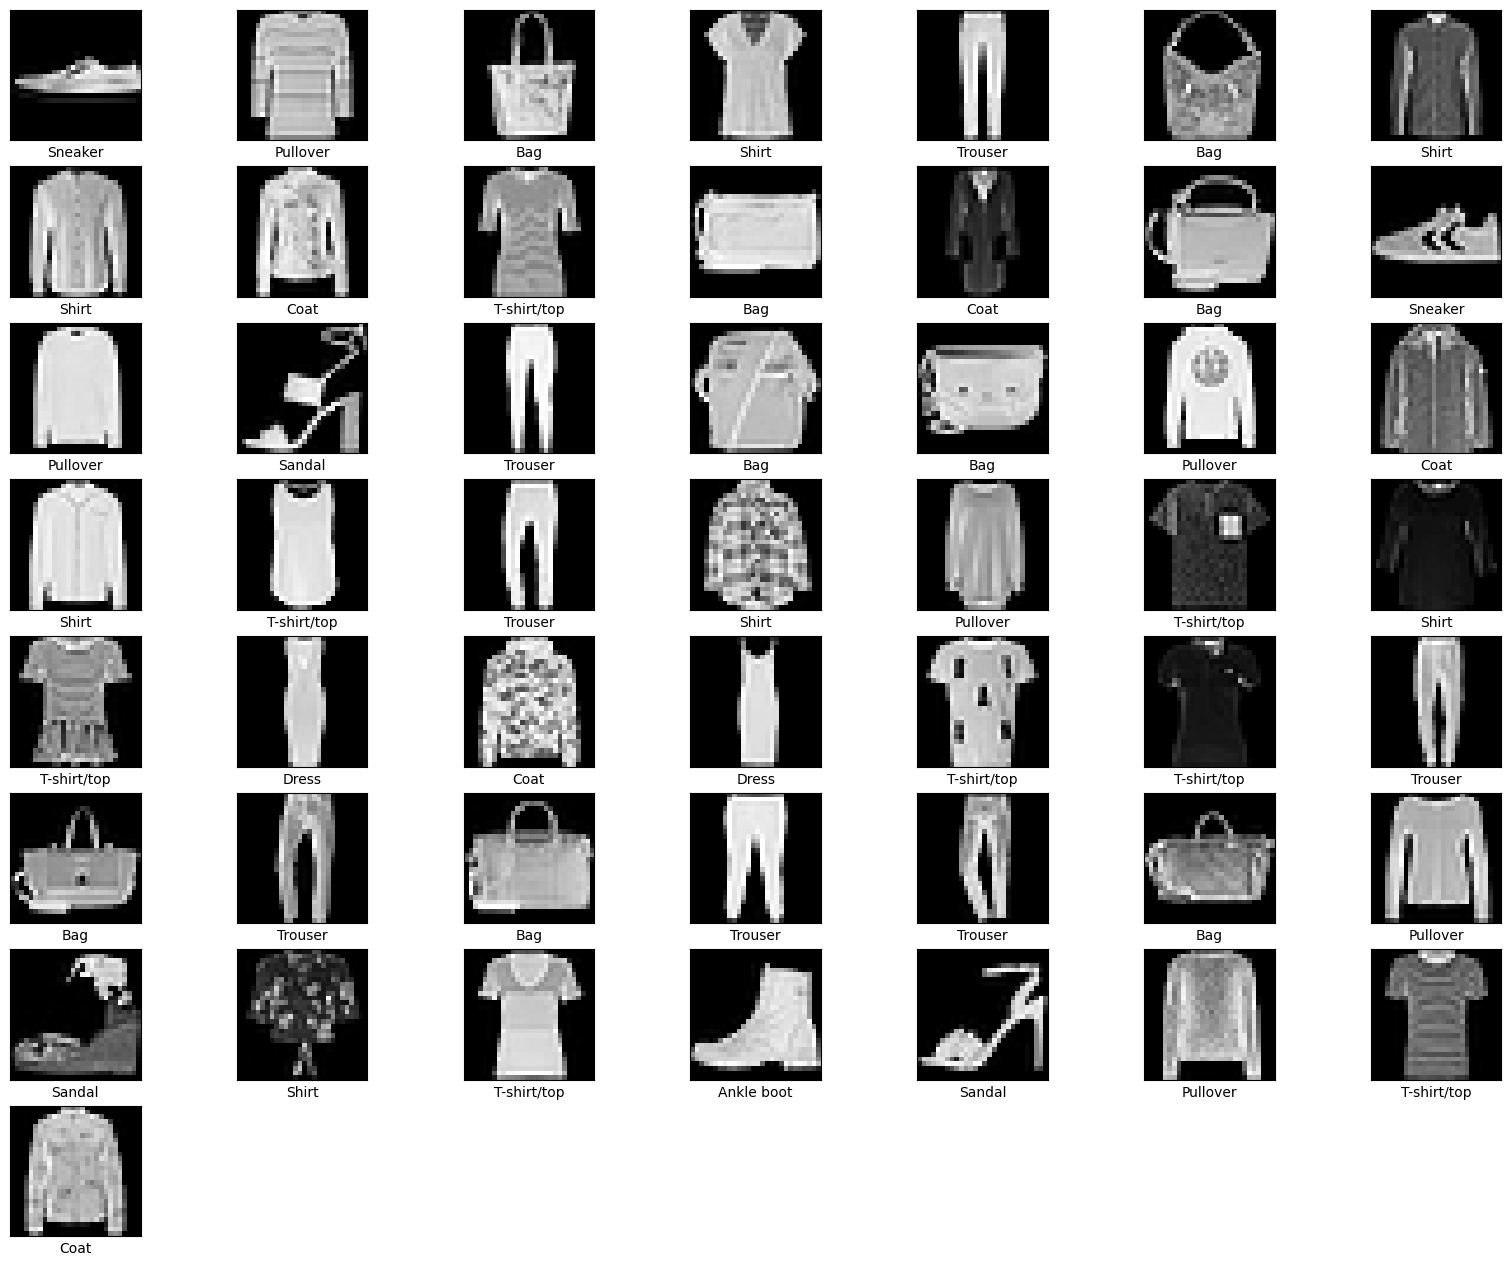

In [35]:
# Another view, showing 50 randomly selected images at a time
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_labels[img_index]])

# Preprocess

In [8]:
from tensorflow import keras
import numpy as np

# Assume you have imported necessary libraries and have the required data available

# Flatten
train_images_flatten = train_images.reshape(train_images.shape[0], 784)
validation_images_flatten = validation_images.reshape(validation_images.shape[0], 784)
test_images_flatten = test_images.reshape(test_images.shape[0], 784)

# Reshape the flattened image data back to its original shape (28x28)
train_images_model = train_images_flatten.reshape(-1, 28, 28)
validation_images_model = validation_images_flatten.reshape(-1, 28, 28)
test_images_model = test_images_flatten.reshape(-1, 28, 28)

# Normalize the images
train_images_model = train_images_model / 255.0
validation_images_model = validation_images_model / 255.0
test_images_model = test_images_model / 255.0

# Convert class vectors to binary class matrices
train_labels_categ = keras.utils.to_categorical(train_labels, num_classes=10)
validation_labels_categ = keras.utils.to_categorical(validation_labels, num_classes=10)
test_labels_categ = keras.utils.to_categorical(test_labels, num_classes=10)


# Train

In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten  # Import necessary layers

# Define constants
batch_size = 128
num_classes = 10
epochs = 40

# Create a Sequential model
model = Sequential()

# Add layers to the Sequential model
model.add(Flatten(input_shape=(28, 28)))  # Input layer: Flatten the input images
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 units and ReLU activation
model.add(Dense(num_classes, activation='softmax'))  # Output layer with num_classes and softmax activation



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',  # Using 'adam' optimizer
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images_model, train_labels_categ,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images_model, validation_labels_categ))




Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7377 - loss: 0.7894 - val_accuracy: 0.8455 - val_loss: 0.4441
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8485 - loss: 0.4325 - val_accuracy: 0.8591 - val_loss: 0.4209
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8648 - loss: 0.3870 - val_accuracy: 0.8548 - val_loss: 0.4015
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8780 - loss: 0.3434 - val_accuracy: 0.8742 - val_loss: 0.3591
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8830 - loss: 0.3325 - val_accuracy: 0.8781 - val_loss: 0.3448
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8868 - loss: 0.3134 - val_accuracy: 0.8760 - val_loss: 0.3423
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8891 - loss: 0.3000 - val_accuracy: 0.8780 - val_loss: 0.3470
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8979 - loss: 0.2825 - val_accuracy: 0.

# Test

In [11]:
score = model.evaluate(test_images_model, test_labels_categ, verbose=0)
print('Test accuracy:', score[1])


Test accuracy: 0.8871999979019165


# Visualizations

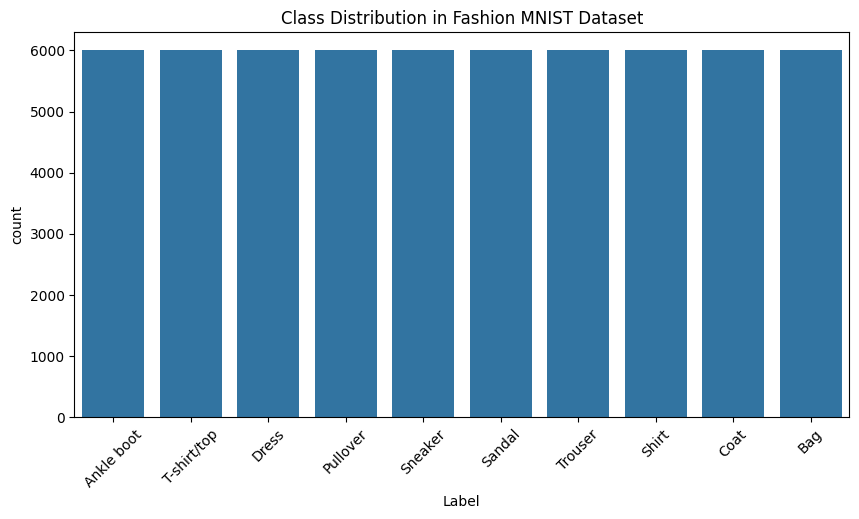

In [20]:
# 2. Plot Class Distribution in the Dataset
# This visualization helps to understand if the dataset is balanced across different classes

import seaborn as sns
import pandas as pd

# Create a DataFrame with labels for visualization
train_labels_df = pd.DataFrame(y_train, columns=['Label'])
train_labels_df['Label'] = train_labels_df['Label'].map(lambda x: class_names[x])

# Plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=train_labels_df, x='Label')
plt.title("Class Distribution in Fashion MNIST Dataset")
plt.xticks(rotation=45)
plt.show()


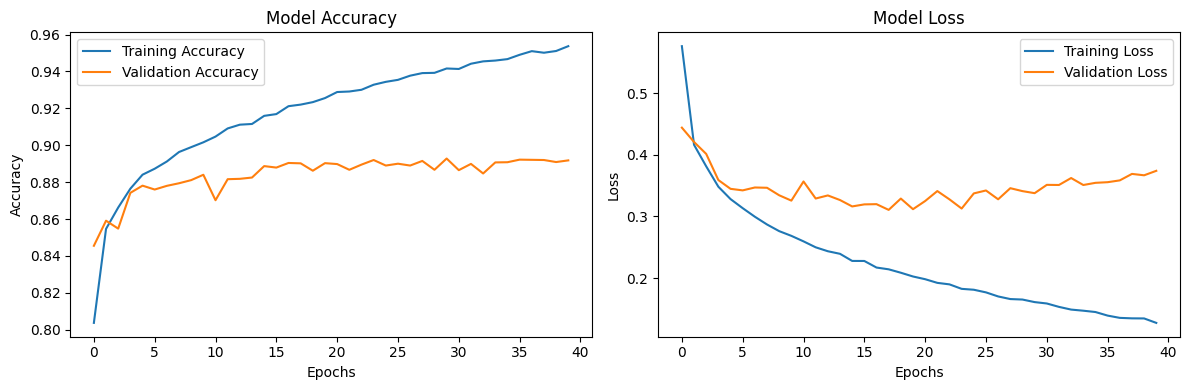

In [25]:
# 3. Show Model Training Performance (Accuracy and Loss Over Epochs)
# You can use this code after training your model to visualize how the model accuracy and loss change over time.
# This will help you understand if the model is converging properly.

# Assuming you have `history` from model training as in the earlier code
def plot_training_performance(history):
    # Summarize history for accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_training_performance(history)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


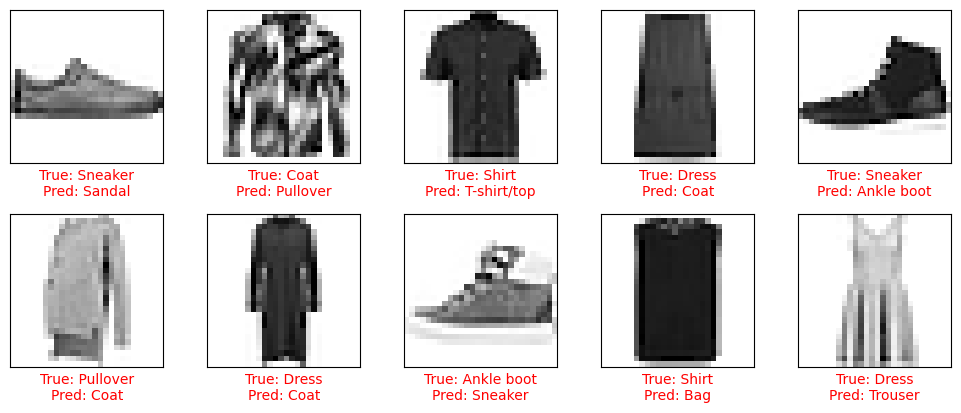

In [31]:
# 4. Show Misclassified Images
# To understand how your model is misclassifying, you can visualize some incorrect predictions.


def show_misclassified_images(X_test, y_test, y_pred_classes, num_images=10):
    misclassified_indices = np.where(y_pred_classes != y_test)[0]
    plt.figure(figsize=(10, 10))

    if len(misclassified_indices) == 0:
        print("No misclassified images!")
        return

    for i, index in enumerate(misclassified_indices[:num_images]):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[index].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f"True: {class_names[y_test[index]]}\nPred: {class_names[y_pred_classes[index]]}", color='red')

    plt.tight_layout()
    plt.show()

# Use reshaped input for predictions
y_pred = model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred_classes = np.argmax(y_pred, axis=1)
show_misclassified_images(X_test.reshape(-1, 28, 28), y_test, y_pred_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


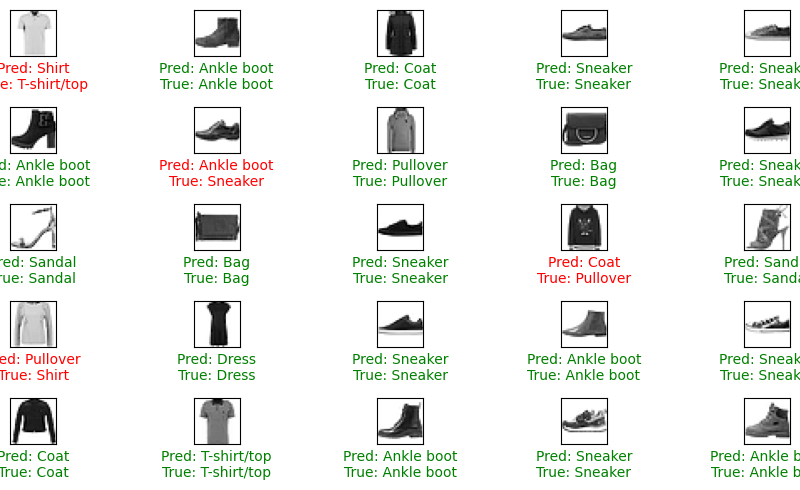

In [30]:
# 5. Display Sample Predictions on Test Images
# This will allow you to see how well your model is performing by showing some sample predictions.

def show_sample_predictions(model, X_test, y_test, class_names):
    plt.figure(figsize=(10, 5))
    for i in range(25):
        index = np.random.randint(0, len(X_test))
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[index].reshape(28, 28), cmap=plt.cm.binary)

        # Adjust the input shape to match the model’s expected input
        processed_image = X_test[index].reshape(1, 28, 28, 1)  # (1, 28, 28, 1) for CNNs

        # Predict the class
        predicted_label = np.argmax(model.predict(processed_image))
        true_label = y_test[index]
        color = 'green' if predicted_label == true_label else 'red'

        plt.xlabel(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}", color=color)

    plt.tight_layout()
    plt.show()

# Example usage
show_sample_predictions(model, X_test.reshape(-1, 28, 28, 1), y_test, class_names)
